In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('activity_context_tracking_data(1) (1).csv')
data.head()


,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.68151,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.68151,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.68151,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting


no missng data points in dataset


In [2]:
data.isnull().sum()

_id           0
orX           0
orY           0
orZ           0
rX            0
rY            0
rZ            0
accX          0
accY          0
accZ          0
gX            0
gY            0
gZ            0
mX            0
mY            0
mZ            0
lux           0
soundLevel    0
activity      0
dtype: int64

            Total  Percentage
_id             0         0.0
gX              0         0.0
soundLevel      0         0.0
lux             0         0.0
mZ              0         0.0
mY              0         0.0
mX              0         0.0
gZ              0         0.0
gY              0         0.0
accZ            0         0.0
orX             0         0.0
accY            0         0.0
accX            0         0.0
rZ              0         0.0
rY              0         0.0
rX              0         0.0
orZ             0         0.0
orY             0         0.0
activity        0         0.0


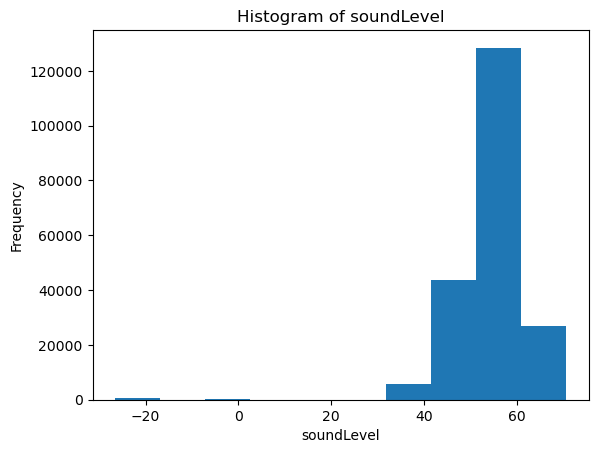

               count           mean           std         min           25%  \
_id         205520.0  102760.500000  59328.657999    1.000000  51380.750000   
orX         205520.0     189.455094     80.359907    0.000000    139.000000   
orY         205520.0       2.726547     22.446067 -178.000000     -3.000000   
orZ         205520.0       0.414120     12.438395  -86.000000     -3.000000   
rX          205520.0      -0.017598      0.148930   -0.712191     -0.094141   
rY          205520.0      -0.011672      0.113509   -0.556955     -0.100048   
rZ          205520.0       0.038061      0.791781   -0.999912     -0.874552   
accX        205520.0       0.095601      1.948063  -19.536700     -0.497994   
accY        205520.0      -0.973535      2.484468  -14.480100     -3.485960   
accZ        205520.0       9.644523      2.638467   -5.975930      8.887280   
gX          205520.0       0.102566      1.818980  -13.657700     -0.457989   
gY          205520.0      -0.977011      2.335549   

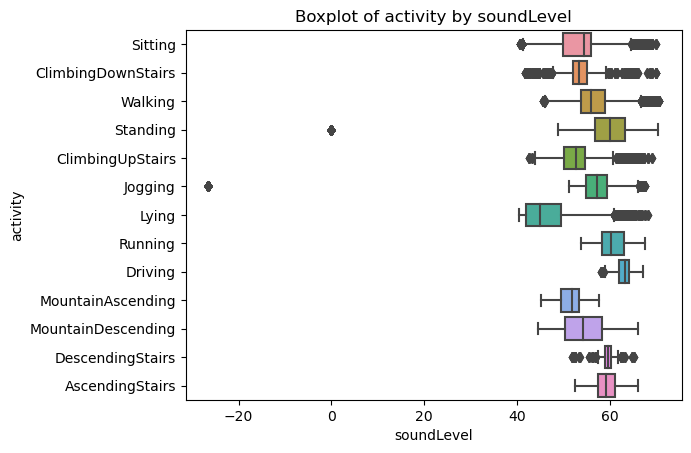

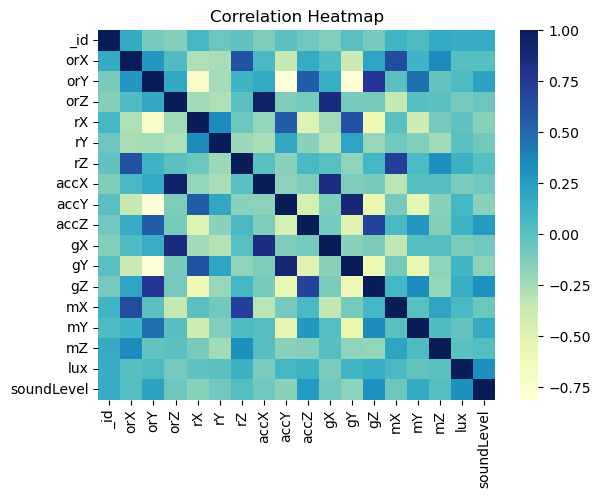

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def check_missing_data(df):
    """
    This function checks for missing data in the dataframe and returns the total count and percentage.
    """
    missing_data = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (missing_data/len(df))*100
    missing_data_df = pd.concat([missing_data, percent_missing], axis=1, keys=['Total', 'Percentage'])
    return missing_data_df

def calculate_descriptive_stats(df):
    """
    This function calculates descriptive statistics for the numerical columns in the dataframe.
    """
    stats = df.describe().transpose()
    stats['skewness'] = df.skew(numeric_only=True)
    stats['kurtosis'] = df.kurtosis(numeric_only=True)

    return stats

def plot_histogram(df, column):
    """
    This function plots a histogram for a given column in the dataframe.
    """
    plt.hist(df[column])
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(df, column, target):
    """
    This function plots a boxplot for a given column in the dataframe with respect to the target variable.
    """
    sns.boxplot(x=target, y=column, data=df)
    plt.title('Boxplot of {} by {}'.format(column, target))
    plt.show()

def plot_correlation_heatmap(df):
    """
    This function plots a correlation heatmap for the entire dataframe.
    """
    corr = df.corr(numeric_only=True)

    sns.heatmap(corr, cmap="YlGnBu")
    plt.title('Correlation Heatmap')
    plt.show()


def perform_eda(df):
    """
    This function performs exploratory data analysis on the given dataframe.
    """
    # Check for missing data
    missing_data_df = check_missing_data(df)
    print(missing_data_df)

    # Plot histogram
    plot_histogram(df, 'soundLevel')

    # Calculate descriptive statistics
    descriptive_stats = calculate_descriptive_stats(df)
    print(descriptive_stats)


    # Plot boxplot
    plot_boxplot(df, 'activity', 'soundLevel')

    # # Plot correlation heatmap
    plot_correlation_heatmap(df)


df = pd.read_csv('activity_context_tracking_data(1) (1).csv')
perform_eda(df)



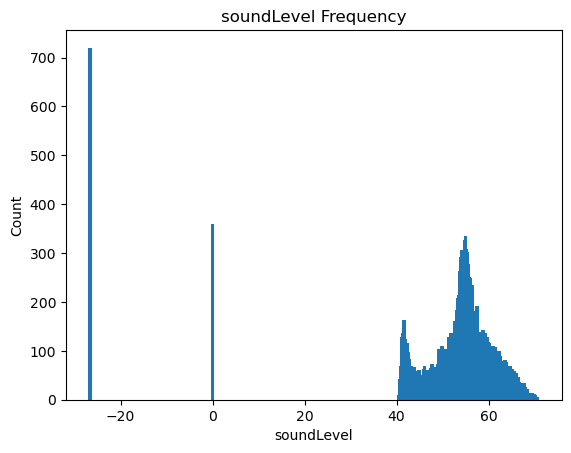

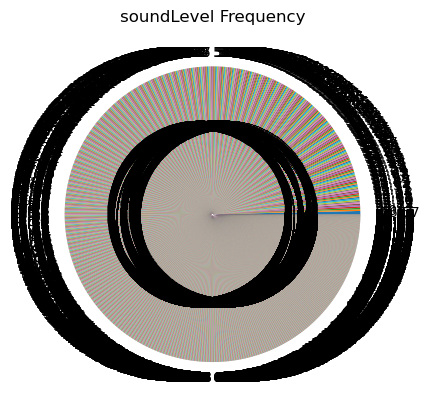

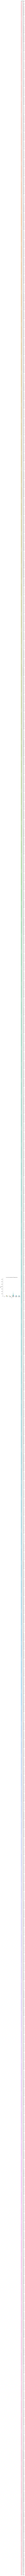

KeyboardInterrupt: 

In [4]:

# Plot a bar chart of gender frequency
soundLevel_freq = df['soundLevel'].value_counts()
plt.bar(soundLevel_freq.index, soundLevel_freq.values)
plt.title('soundLevel Frequency')
plt.xlabel('soundLevel')
plt.ylabel('Count')
plt.show()

# Plot a pie chart of gender frequency
plt.pie(soundLevel_freq.values, labels=soundLevel_freq.index, autopct='%1.1f%%')
plt.title('soundLevel Frequency')
plt.show()

# Plot a grouped bar chart of education and gender frequencies
lux_soundLevel_freq = df.groupby(['lux', 'soundLevel']).size().reset_index(name='count')
sns.catplot(x='lux', y='count', hue='soundLevel', data=lux_soundLevel_freq, kind='bar')
plt.title('lux and soundLevel Frequencies')
plt.xlabel('lux')
plt.ylabel('Count')
plt.show()

# Plot a stacked bar chart of age and gender frequencies
activity_soundLevel_freq = df.groupby(['activity', 'soundLevel']).size().reset_index(name='count')
activity_soundLevel_freq =activity_soundLevel_freq.pivot(index='activity', columns='soundLevel', values='count')
activity_soundLevel_freq.plot(kind='bar', stacked=True)
plt.title('activity and soundLevel Frequencies')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

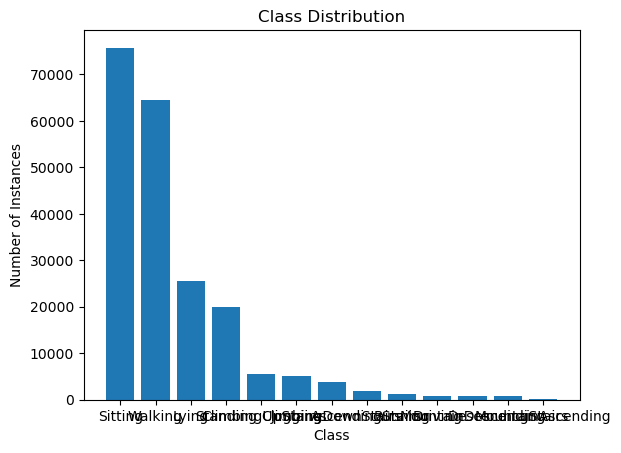

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv('activity_context_tracking_data(1) (1).csv')

# Count the number of instances for each class
class_counts = df['activity'].value_counts()

# Plot the class distribution as a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()


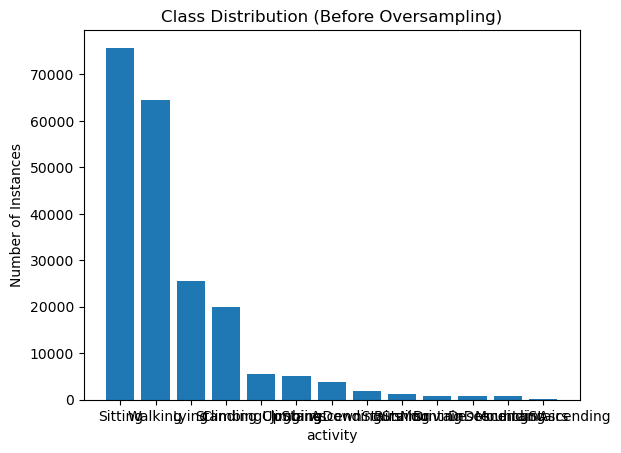

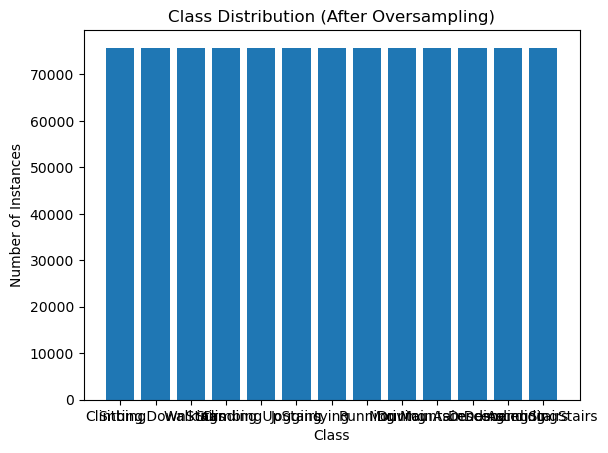

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Load the dataset into a pandas DataFrame
df = pd.read_csv('activity_context_tracking_data(1) (1).csv')

# Count the number of instances for each class
class_counts = df['activity'].value_counts()

# Plot the class distribution as a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('activity')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Before Oversampling)')
plt.show()

# Perform oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(df.drop('activity', axis=1), df['activity'])
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='activity')], axis=1)

# Count the number of instances for each class after oversampling
class_counts_resampled = df_resampled['activity'].value_counts()

# Plot the class distribution as a bar chart after oversampling
plt.bar(class_counts_resampled.index, class_counts_resampled.values)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (After Oversampling)')
plt.show()
